In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neuralps.diffops import Linear, ReLU, DropOut, Softmax, FullForward
from neuralps.loss import CategoricalCrossEntropy
from neuralps.metrics import multi_class_accuracy
from neuralps.model import Model

# Loading and Preparing the MNIST Dataset

In [2]:
mnist = np.load('mnist.npz')

vectors_train = mnist['train'].T
train_size = vectors_train.shape[0]

vectors_test = mnist['test'].T
test_size = vectors_test.shape[0]

labels_train = mnist['train_labels'].flatten().astype(int)
labels_test = mnist['test_labels'].flatten().astype(int)

n_classes = 10
n_features = vectors_train.shape[1]

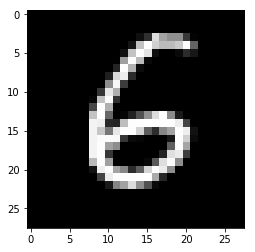

In [3]:
images_train = vectors_train.reshape(-1, 28, 28)

sample_image = images_train[np.random.randint(0, train_size)]
plt.imshow(sample_image, cmap='gray');

In [4]:
vectors_train.min(), vectors_train.max()

(0, 255)

In [5]:
X_train = vectors_train / 255.
X_test = vectors_test / 255.

In [6]:
y_train = np.zeros((train_size, n_classes))
y_test = np.zeros((test_size, n_classes))

y_train[np.arange(train_size), labels_train] = 1
y_test[np.arange(test_size), labels_test] = 1

# Building a Multi-Layer Perceptron Model

In [ ]:
np.random.seed(0)

softmax_regression = Model(
    Linear(n_features, n_classes),
    Softmax()
)

softmax_regression.train(
    X_train, y_train,
    loss_function=CategoricalCrossEntropy,
    batch_size=50,
    epochs=10,
    algorithm='rmsprop',
    learning_rate=.001,
    metric=multi_class_accuracy,
    verbose=True,
    X_val=X_test,
    y_val=y_test
)

In [ ]:
np.random.seed(0)

n_hidden_units = 512
keep_prob = .25

mlp = Model(
    Linear(n_features, n_hidden_units),
    ReLU(),
    DropOut(keep_prob),
    Linear(n_hidden_units, n_classes),
    Softmax()
)

mlp.train(
    X_train, y_train,
    loss_function=CategoricalCrossEntropy,
    batch_size=50,
    epochs=10,
    algorithm='rmsprop',
    learning_rate=.001,
    metric=multi_class_accuracy,
    verbose=True,
    X_val=X_test,
    y_val=y_test,
    save_best_model='mlp-mnist.npz'
)

In [ ]:
loaded_mlp = Model.load('mlp-mnist.npz')

y_pred = loaded_mlp.predict(X_test)

multi_class_accuracy(y_test, y_pred)

In [ ]:
np.random.seed(0)

n_hidden = 256
keep_prob = .5

mlp = Model(
    Linear(n_features, n_hidden),
    ReLU(),
    DropOut(keep_prob),
    FullForward(n_hidden, n_hidden, activation=ReLU()),
    DropOut(keep_prob),
    FullForward(2 * n_hidden, n_hidden, activation=ReLU()),
    Linear(3 * n_hidden, n_classes),
    Softmax()
)

mlp.train(
    X_train, y_train,
    loss_function=CategoricalCrossEntropy,
    batch_size=50,
    epochs=10,
    algorithm='rmsprop',
    learning_rate=.001,
    metric=multi_class_accuracy,
    verbose=True,
    X_val=X_test,
    y_val=y_test#,
    #save_best_model='mlp-mnist.npz'
)

EPOCH 0
 - train loss: 0.0184     acc: 0.9452
 - val  loss: 0.0179     acc: 0.9453
EPOCH 1
 - train loss: 0.0127     acc: 0.9626
 - val  loss: 0.0133     acc: 0.9596
EPOCH 2
 - train loss: 0.0104     acc: 0.9686
 - val  loss: 0.0117     acc: 0.9643
EPOCH 3
 - train loss: 0.0091     acc: 0.9729
 - val  loss: 0.0105     acc: 0.9689
EPOCH 4
 - train loss: 0.0082     acc: 0.9759
 - val  loss: 0.0102     acc: 0.9709
EPOCH 5
 - train loss: 0.0079     acc: 0.9770
 - val  loss: 0.0104     acc: 0.9719
EPOCH 6
 - train loss: 0.0072     acc: 0.9791
 - val  loss: 0.0098     acc: 0.9734
EPOCH 7
 - train loss: 0.0065     acc: 0.9811
 - val  loss: 0.0095     acc: 0.9734
EPOCH 8
 - train loss: 0.0061     acc: 0.9823
 - val  loss: 0.0093     acc: 0.9739


In [11]:
ff = FullForward(10, 5, activation=ReLU())

In [12]:
x = np.ones((1, 10))

In [13]:
ff.forward(x)

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.15829461, 0.        , 2.04917387, 0.        , 1.32865209]])